# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_combined_final'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_combined_final',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_combined_final\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_combined_final\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_combined_final\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [10]:
# https://www.tensorflow.org/install/source_windows

In [18]:
if os.name=='nt':
    !pip install wget
    import wget

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [44]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  96% (2897/3009)
Updating files:  97% (2919/3009)
Updating files:  98% (2949/3009)
Updating files:  99% (2979/3009)
Updating files: 100% (3009/3009)
Updating files: 100% (3009/3009), done.


In [58]:
# Install Tensorflow Object Detection 

if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 


100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-38: module references __file__
listing git files failed - pretending there aren't any
zip_safe flag not set; analyzing archive contents...
error: numpy 1.22.0 is installed but numpy<1.22.0,>=1.14.3 is required by {'apache-beam'}


copying build\lib\nets\inception_resnet_v2_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_utils.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v1.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v1_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v2.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v2_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v3.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v3_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v4.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\inception_v4_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\lenet.py -> build\bdist.win-amd64\egg\nets
creating build\bdist.win-amd64\egg\nets\mobilenet
copying build\lib\nets\mobilenet\conv_blocks.py -> build\bdist.win-amd64\egg\nets\mobilenet
copying build\lib\nets\mobi

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///C:/Users/brandon/Documents/tenorflow_Object_Detection_tutorial/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):
  File "C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\models\ssd_efficientnet_bifpn_feature_extractor.py", line 35, in <module>
    from official.legacy.image_classification.efficientnet import efficientnet_model
ModuleNotFoundError: No module named 'official.legacy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 25, in <module>
    from object_detection.builders import model_builder
  File "C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\model_builder.py", line 70, in <module>
    from object_detection.models import ssd_efficientnet_bifpn_feature_extractor as ssd_efficientnet_bifpn
  File "C:\Users\b

In [60]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [61]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 895.9/895.9 KB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 49.0 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.37.0 requires cloudpickle<3,>=2.0.0, which is not installed.
apache-beam 2.37.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.37.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.37.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
tensorflow-datasets 4.5.2 requires tensorflow-metadata, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, but you have tf-models-official 2.3.0 which is incompatible.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires httplib2<0.20.0,>=0.8, but you have httplib2 0.20.4 which is incompatible.
apache-beam 2.37.0 requires numpy<1.22.0,>=1.14.3, but you have numpy 1.22.0 which is incompatible.


In [37]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [38]:
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [39]:
import object_detection

In [8]:
!pip list

Package                       Version             Editable project location
----------------------------- ------------------- ---------------------------------------------------------------------------------------------------------
absl-py                       1.0.0
apache-beam                   2.37.0
appdirs                       1.4.4
astunparse                    1.6.3
attrs                         21.4.0
audioread                     2.1.9
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.10
colorama                      0.4.4
contextlib2                   21.6.0
cycler                        0.11.0
Cython                        0.29.26
dataclasses                   0.6
debugpy                       1.5.1
decorator                     5.1.0
dill                          0.3.4
dm-tree                       0.1.6
e

In [10]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  3% [..                                                                      ]  1556480 / 46042990

  7% [.....                                                                   ]  3432448 / 46042990

 12% [........                                                                ]  5529600 / 46042990

 17% [............                                                            ]  8044544 / 46042990

 22% [................                                                        ] 10412032 / 46042990

 27% [...................                                                     ] 12582912 / 46042990

 31% [......................                                                  ] 14417920 / 46042990

 35% [.........................                                               ] 16539648 / 46042990

 39% [............................                                            ] 18268160 / 46042990

 44% [...............................                                         ] 20365312 / 46042990

 47% [..................................                                      ] 21823488 / 46042990

 52% [.....................................                                   ] 24166400 / 46042990

 57% [.........................................                               ] 26574848 / 46042990

 62% [............................................                            ] 28753920 / 46042990

 67% [................................................                        ] 30941184 / 46042990

 71% [...................................................                     ] 33144832 / 46042990

 75% [......................................................                  ] 34594816 / 46042990

 77% [........................................................                ] 35889152 / 46042990

 82% [...........................................................             ] 38141952 / 46042990

 88% [...............................................................         ] 40656896 / 46042990

 93% [...................................................................     ] 42893312 / 46042990

 98% [......................................................................  ] 45318144 / 46042990

100% [........................................................................] 46042990 / 46042990

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [9]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
label_string = "["
count = 1
for c in class_names:
    new_string = "{'name':'" + c + "','id':" + str(count) + "}, "
    label_string += new_string
    count += 1
label_string += "]"
print(label_string)

[{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','i

In [37]:
from PIL import Image, ExifTags

# Run to format annotation files correctly
start_file_name = "C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\collectedimages\\new_bella_testing_formatted\\"
file_names = os.listdir("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\collectedimages\\new_bella_testing_formatted")
count = 0
found = 0
t = 0
for f in file_names:
    image = Image.open(start_file_name + f)
    try:
        if dict(image._getexif().items()).get(274) == 6:
            print("bad", f)
    except:
        print(end="")
    image.close()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\collectedimages\\new_bella_testing_formatted'

In [10]:
# Run to format annotation files correctly
file_names = os.listdir("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train")
count = 0
found = 0
t = 0
for f in file_names:
    if f[-1] == "l":
        with open("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train\\" + file_names[t], "r") as file:
            lines = file.readlines()
            found = False
            for line in lines:
                if line.strip("\n") == "		<occluded>0</occluded>":
                    found = True
        if found == True:
            with open("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train\\" + file_names[t], "w") as write_file:
                for line in lines:
                    if line.strip("\n") != "		<occluded>0</occluded>":
                        write_file.write(line)
        count += 1
    t += 1

print(count)
print(found)

2508
False


In [30]:
#make sure ymin and xmax are in the right order
file_names = os.listdir("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train")
count = 0
found = 0
t = 0
for f in file_names:
    if f[-1] == "l":
        with open("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train\\" + file_names[t], "r") as file:
            lines = file.readlines()
        with open("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train\\" + file_names[t], "w") as write_file:
            ymin_found = False
            xmax_found = False
            xmax_line = ""
            for line in lines:
                if line.strip("\n")[4:8] != "xmax" and line.strip("\n")[4:8] != "ymin" and line.strip("\n")[4:8] != "ymax":
                    write_file.write(line)
                elif line.strip("\n")[4:8] == "xmax":
                    if ymin_found == True:
                        write_file.write(line)
                    else:
                        xmax_line = line
                        xmax_found = True
                elif line.strip("\n")[4:8] == "ymin":
                    if xmax_found == False:
                        ymin_found = True
                        write_file.write(line)
                    else:
                        write_file.write(line)
                        write_file.write(xmax_line)
                elif line.strip("\n")[4:8] == "ymax":
                    write_file.write(line)
                    ymin_found = False
                    xmax_found = False
                    xmax_line = ""
        count += 1
    t += 1



In [69]:
#make sure all boxes are positive
file_names = os.listdir("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train")
count = 0
checked = 0
found = 0
heights = 0
widths = 0
overs = 0
t = 0
areas_check = 0
for f in file_names:
    if f[-1] == "l":
        with open("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\train\\" + file_names[t], "r") as file:
            lines = file.readlines()
            height = 0
            width = 0
            xmin = 0
            ymin = 0
            xmax = 0
            ymax = 0
            ymax_checked = False
            for line in lines:
                if line.strip("\n")[3] == "w":
                    stuff = line.split(">")
                    number = stuff[1].split("<")[0]
                    widths += 1
                    width = int(number)
                    if width < 0:
                        print("negative width")
                if line.strip("\n")[3] == "h":
                    stuff = line.split(">")
                    number = stuff[1].split("<")[0]
                    heights += 1
                    height = int(number)
                    if height < 0:
                        print("negative height")
                if line.strip("\n")[4] == "x" or line.strip("\n")[4] == "y":
                    stuff = line.split(">")
                    number = stuff[1].split("<")[0]
                    checked += 1
                    if int(number) < 0:
                        found += 1
                    if line.strip("\n")[4] == "x":
                        if int(number) > width:
                            over += 1
                    if line.strip("\n")[4] == "y":
                        if int(number) > height:
                            over += 1
                    if line.strip("\n")[4:8] == "xmin":
                        xmin = int(number)
                    if line.strip("\n")[4:8] == "ymin":
                        ymin = int(number)
                    if line.strip("\n")[4:8] == "xmax":
                        xmax = int(number)
                    if line.strip("\n")[4:8] == "ymax":
                        if ymax_checked == True:
                            #print(f)
                            print(end="")
                        ymax_checked = True
                        areas_check += 1
                        ymax = int(number)
                        if xmin == 0 or xmax == 0 or ymin == 0:
                            print("All zero")
                        if (xmin > xmax or ymin > ymax):
                            print("Wrong order!")
                        if (xmax - xmin) * (ymax - ymin) <= 0:
                            print("zero area")
                        if width == xmax:
                            print("same width", f)
                        if height == ymax:
                            print("same height", f)
        count += 1
        #print(width, height, xmin, ymin, xmax, ymax, f)
    t += 1
print(count)
print(checked)
print(found)
print(heights)
print(widths)
print(overs)
print(areas_check)

2607
10448
0
2607
2607
0
2611


In [38]:
labels = [{'name':'cat-Abyssinian','id':1}, {'name':'cat-Bengal','id':2}, {'name':'cat-Birman','id':3}, {'name':'cat-Bombay','id':4}, {'name':'cat-British_Shorthair','id':5}, {'name':'cat-Egyptian_Mau','id':6}, {'name':'cat-Maine_Coon','id':7}, {'name':'cat-Persian','id':8}, {'name':'cat-Ragdoll','id':9}, {'name':'cat-Russian_Blue','id':10}, {'name':'cat-Siamese','id':11}, {'name':'cat-Sphynx','id':12}, {'name':'dog-american_bulldog','id':13}, {'name':'dog-american_pit_bull_terrier','id':14}, {'name':'dog-basset_hound','id':15}, {'name':'dog-beagle','id':16}, {'name':'dog-boxer','id':17}, {'name':'dog-chihuahua','id':18}, {'name':'dog-english_cocker_spaniel','id':19}, {'name':'dog-english_setter','id':20}, {'name':'dog-german_shorthaired','id':21}, {'name':'dog-great_pyrenees','id':22}, {'name':'dog-havanese','id':23}, {'name':'dog-japanese_chin','id':24}, {'name':'dog-keeshond','id':25}, {'name':'dog-leonberger','id':26}, {'name':'dog-miniature_pinscher','id':27}, {'name':'dog-newfoundland','id':28}, {'name':'dog-pomeranian','id':29}, {'name':'dog-pug','id':30}, {'name':'dog-saint_bernard','id':31}, {'name':'dog-samoyed','id':32}, {'name':'dog-scottish_terrier','id':33}, {'name':'dog-shiba_inu','id':34}, {'name':'dog-staffordshire_bull_terrier','id':35}, {'name':'dog-wheaten_terrier','id':36}, {'name':'dog-yorkshire_terrier','id':37}, {'name' : 'bella', 'id':38}]
#labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]
#labels = [{'name':'bella','id':1}]
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [71]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [39]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [40]:
files['TF_RECORD_SCRIPT']
paths['ANNOTATION_PATH']

'Tensorflow\\workspace\\annotations'

In [42]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [58]:
!pip install pytz

You should consider upgrading via the 'c:\users\brandon\documents\tenorflow_object_detection_tutorial\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


# 4. Copy Model Config to Training Folder

In [43]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [44]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [45]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [46]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [47]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [48]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [49]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [12]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [9]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=20000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [10]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_larger_species --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_larger_species\pipeline.config --num_train_steps=20000


In [21]:
#!{command}

# 7. Evaluate the Model

In [13]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [14]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_combined_final --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_combined_final\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_combined_final


In [15]:
!{command}

Traceback (most recent call last):
  File "Tensorflow\models\research\object_detection\model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\model_lib_v2.py", line 31, in <module>
    from object_detection import model_lib
  File "C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\model_lib.py", line 34, in <module>
    from object_detection.builders import optimizer_builder
  File "C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\optimizer_builder.py", line 25, in <module>
    from official.modeling.optimization import ema_optimizer
ImportError: cannot import name 'ema_optimizer' from 'official.modeling.opt

# 8. Load Train Model From Checkpoint

In [22]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [23]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-75')).expect_partial()

@tf.function
def detect_fn(image):
    #print("image1: ", image)
    image, shapes = detection_model.preprocess(image)
    #print("image: ", image)
    #print("Shapes: ", shapes)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [24]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [26]:
images = os.listdir("C:\\Users\\brandon\\Documents\\tenorflow_Object_Detection_tutorial\\TFODCourse\\Tensorflow\\workspace\\images\\test")

In [27]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Abyssinian_131_jpg.rf.e8acfb60e4d01529586b9d81930b35a2.jpg')

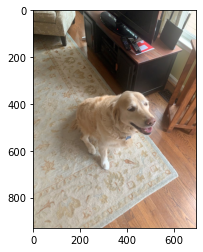

FPS: 5.348417651304364


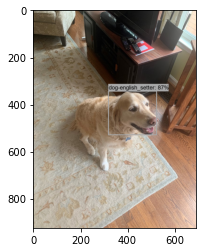

FPS: 24.291289012955573


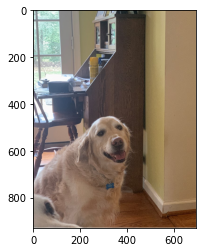

FPS: 24.001739628040056


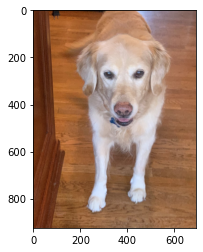

FPS: 24.28988226573313


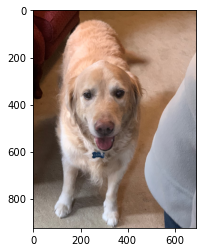

FPS: 25.202064568850005


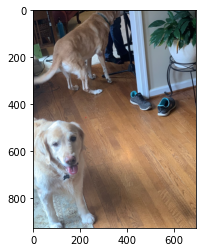

FPS: 23.443260132019475


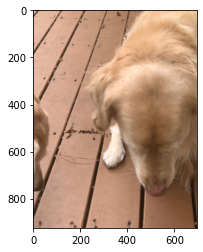

FPS: 24.587044961603844


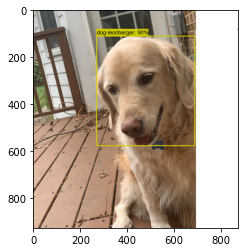

FPS: 24.58574786487611


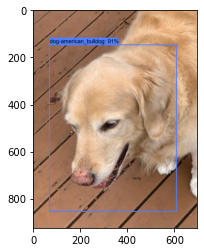

FPS: 24.291007650475766


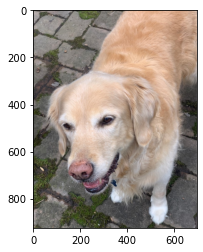

FPS: 24.29044494506958


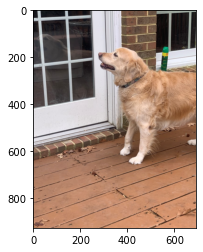

FPS: 0.1597217737169262


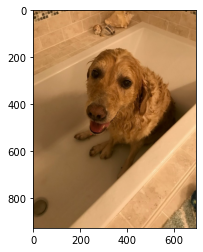

FPS: 0.16371981942005698


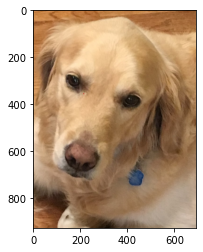

FPS: 0.161877057303837


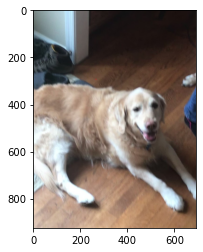

FPS: 4.4408088589515415


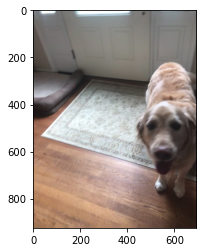

FPS: 0.1590397154510218


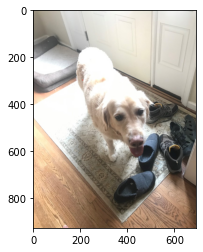

FPS: 0.16112436835585423


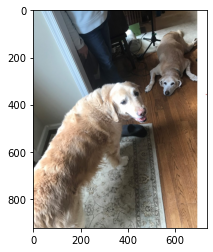

FPS: 0.16204245544599746


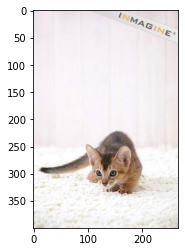

FPS: 0.11364008350667337


KeyboardInterrupt: 

In [29]:
import time
import random

random_images = []
for x in images:
    if x[-1] != "l":
        random_images.append(x)

for i in random_images:
    IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', i)
    
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    start = time.time()
    detections = detect_fn(input_tensor)
    finish = time.time()

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.7,
                agnostic_mode=False)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

    print("FPS:", 1 / (finish - start))

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [15]:
from IPython.display import clear_output
import time

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    
    clear_output()
    start = time.time()
    detections = detect_fn(input_tensor)
    finish = time.time()
    print("FPS:", 1 / (finish - start))
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

FPS: 18.163529202880664


# 10. Freezing the Graph

In [36]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [37]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [38]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_bella_only\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_bella_only --output_directory=Tensorflow\workspace\models\my_ssd_bella_only\export


In [39]:
!{command}

2022-03-11 13:33:28.753042: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 13:33:29.076814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5181 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0311 13:33:29.882126  7160 deprecation.py:614] From C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\tensorf

# 11. Conversion to TFJS

In [61]:
!pip install tensorflowjs

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.
tf-models-official 2.7.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.7.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.7.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.7.0 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires sacrebleu, which is not installed.
tf-models-official 2.7.0 requires sentencepiece, which is not installed.
tf-models-official 2.7.0 requires seqeval, which is not installed.
tf-models-official 2.7.0 requires tensorflow-datasets, which is not installed

In [62]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [63]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [64]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2022-01-05 21:18:38.970840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-05 21:18:38.970861: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-05 21:18:41.444374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-05 21:18:41.444773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-01-05 21:18:41.445159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-01-05 21:18:41.445541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [11]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [12]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [13]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_larger_species\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_larger_species --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_larger_species\tfliteexport


In [14]:
!{command}

2022-03-11 15:36:30.363530: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 15:36:30.690949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5461 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-03-11 15:36:35.311782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5461 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-03-11 15:36:36.455031: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/tas

In [15]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [16]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [17]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet_larger_species\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet_larger_species\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [18]:
!{command}

Estimated count of arithmetic ops: 6.806 G  ops, equivalently 3.403 G  MACs


2022-03-11 15:36:58.818732: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-11 15:36:59.142315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5461 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-03-11 15:37:06.492990: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-03-11 15:37:06.493003: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-03-11 15:37:06.493007: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [49]:
from IPython.display import clear_output


In [14]:
# 13. Zip and Export Models 

# 14. Exporting at TensorRT

In [7]:
#from tensorflow.python.compiler.tensorrt import trt_convert as tf_trt
#from tensorflow.python.saved_model import tag_constants
#import tensorflow as tf
import tensorrt as trt

import numpy as np

ModuleNotFoundError: No module named 'tensorrt'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_larger_species\\pipeline.config'

In [19]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_larger_species'

In [22]:
tf.contrib

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [1]:
class_names = ["cat-Abyssinian", "cat-Bengal", "cat-Birman", "cat-Bombay", "cat-British_Shorthair", "cat-Egyptian_Mau", "cat-Maine_Coon", "cat-Persian", "cat-Ragdoll", "cat-Russian_Blue", "cat-Siamese", "cat-Sphynx", "dog-american_bulldog", "dog-american_pit_bull_terrier", "dog-basset_hound", "dog-beagle", "dog-boxer", "dog-chihuahua", "dog-english_cocker_spaniel", "dog-english_setter", "dog-german_shorthaired", "dog-great_pyrenees", "dog-havanese", "dog-japanese_chin", "dog-keeshond", "dog-leonberger", "dog-miniature_pinscher", "dog-newfoundland", "dog-pomeranian", "dog-pug", "dog-saint_bernard", "dog-samoyed", "dog-scottish_terrier", "dog-shiba_inu", "dog-staffordshire_bull_terrier", "dog-wheaten_terrier", "dog-yorkshire_terrier"]
for c in class_names:
    print(c)

cat-Abyssinian
cat-Bengal
cat-Birman
cat-Bombay
cat-British_Shorthair
cat-Egyptian_Mau
cat-Maine_Coon
cat-Persian
cat-Ragdoll
cat-Russian_Blue
cat-Siamese
cat-Sphynx
dog-american_bulldog
dog-american_pit_bull_terrier
dog-basset_hound
dog-beagle
dog-boxer
dog-chihuahua
dog-english_cocker_spaniel
dog-english_setter
dog-german_shorthaired
dog-great_pyrenees
dog-havanese
dog-japanese_chin
dog-keeshond
dog-leonberger
dog-miniature_pinscher
dog-newfoundland
dog-pomeranian
dog-pug
dog-saint_bernard
dog-samoyed
dog-scottish_terrier
dog-shiba_inu
dog-staffordshire_bull_terrier
dog-wheaten_terrier
dog-yorkshire_terrier


In [1]:
from tensorflow.python.compiler.tensorrt import trt_convert as trt

ImportError: cannot import name 'trt_convert' from 'tensorflow.python.compiler.tensorrt' (C:\Users\brandon\Documents\tenorflow_Object_Detection_tutorial\TFODCourse\tfod\lib\site-packages\tensorflow\python\compiler\tensorrt\__init__.py)

In [24]:
from pprint import pprint
pprint(vars(detection_model))

{'_activity_regularizer': None,
 '_add_background_class': True,
 '_add_summaries': True,
 '_anchor_generator': <object_detection.anchor_generators.multiscale_grid_anchor_generator.MultiscaleGridAnchorGenerator object at 0x000001EEE27A0250>,
 '_anchors': <object_detection.core.box_list.BoxList object at 0x000001F119966850>,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_batched_prediction_tensor_names': ListWrapper(['preprocessed_inputs', 'feature_maps', 'final_anchors', 'box_encodings', 'class_predictions_with_background']),
 '_box_coder': <object_detection.box_coders.faster_rcnn_box_coder.FasterRcnnBoxCoder object at 0x000001EEEB29F430>,
 '_box_predictor': <object_detection.predictors.convolutional_keras_box_predictor.WeightSharedConvolutionalBoxPredictor object at 0x000001F072959130>,
 '_build_input_shape': None,
 '_callable_losses': [],
 '_classification_loss': <object_detection.core.losses.SigmoidFocalClassificationLoss object at 0x000001F0729BE0D0>,
 '_classification_loss